In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pathlib import Path
%matplotlib inline

In [2]:
# open cvs
filename = "/Users/giuliopiccolo/Desktop/lab/project/dataset/NYC_Airbnb_2017.csv"
filename1 = "/Users/giuliopiccolo/Desktop/lab/project/dataset/NYC_house_price.csv"
# non vedo grandi lavori di datacleaning. Ci ragioniamo più avanti in caso
df = pd.read_csv(filename)
df.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,11675715,https://www.airbnb.com/rooms/11675715,20171101012912,2017-11-01,Cozy 1 BR Basement Apartment,"City Island is an active, year-round nautical ...",This very cozy apartment with features a queen...,"City Island is an active, year-round nautical ...",none,City Island is a small island and a neighborho...,...,f,NaN,NaN,t,t,flexible,f,f,1,5.84
1,20702398,https://www.airbnb.com/rooms/20702398,20171101012912,2017-11-01,Quiet house on City Island,1 private bedroom and bathroom available for o...,NaN,1 private bedroom and bathroom available for o...,none,This neighborhood is dope! Lot's of seafood re...,...,f,NaN,NaN,f,f,moderate,f,f,1,2.61
2,9147025,https://www.airbnb.com/rooms/9147025,20171101012912,2017-11-01,Cozy City Island Cottage,City Island is a small community at the edge o...,This cozy little cottage is an open floor plan...,City Island is a small community at the edge o...,none,City Island is famous for it's seafood restaur...,...,f,NaN,NaN,f,f,moderate,f,f,1,2.79
3,1936633,https://www.airbnb.com/rooms/1936633,20171101012912,2017-11-01,Great 1BD waterfront City Island NY,NaN,I am renting my lovely one bedroom apartment t...,I am renting my lovely one bedroom apartment t...,none,The place is very conveniently located in City...,...,f,NaN,NaN,t,f,strict,f,f,1,1.06
4,19758402,https://www.airbnb.com/rooms/19758402,20171101012912,2017-11-01,Autumn Getaway at Cozy House By The Beach & Woods,City Island is a quaint coastal town located 4...,Large three bedroom sunny house. Private bedro...,City Island is a quaint coastal town located 4...,none,Beautiful East Coast nature setting. Walk/bike...,...,f,NaN,NaN,f,f,moderate,f,f,1,3.53


### Price dataset requires some cleaning effort

In [25]:
# open NTC_house_price
df_price = pd.read_csv("/Users/giuliopiccolo/Desktop/lab/project/dataset/NYC_house_price.csv")
mylist = df_price['NEIGHBORHOOD'].tolist()
mylist = list(dict.fromkeys(mylist))
mylist[:10]

['ALPHABET CITY',
 'CHELSEA',
 'CHINATOWN',
 'CIVIC CENTER',
 'CLINTON',
 'EAST VILLAGE',
 'FASHION',
 'FINANCIAL',
 'FLATIRON',
 'GRAMERCY']

In [4]:
# get the shape
df_price.shape

(84548, 22)

In [5]:
# get the dimension
df_price.ndim

2

In [6]:
# check the datatype of each colum to avoid surprise
df_price.dtypes

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [7]:
# description of every column
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GRO

In [8]:
# quick overview about key indicators
df_price.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [9]:
# columns' name lower case
df_price = df_price.rename(columns=str.lower)
# drop EASE-MENT column since it is empty and quite useless
del df_price["ease-ment"]
# drop the first column. It's look like an iterator
del df_price["unnamed: 0"]

In [10]:
# let's check duplicate entries
sum(df_price.duplicated(df_price.columns))

765

In [11]:
# delete duplicate and re-check your effort
df_price = df_price.drop_duplicates(df_price.columns, keep="last")
sum(df_price.duplicated(df_price.columns))

0

In [12]:
# checking missing values
df_price.columns[df_price.isnull().any()]

Index([], dtype='object')

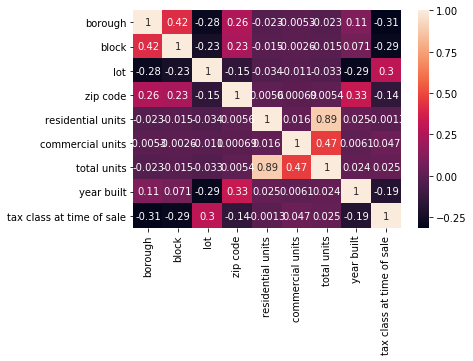

In [16]:
corr = df_price.corr()
sns.heatmap(corr, annot=True)